# Linear Regression

## Simple linear regression with automobile data
We will now use sklearn to to predict automobile milesage per gallon (mpg) and evaluate these predictions. We first load the data and split them into a training set and a testing set.

In [566]:
#load mtcars
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

dfcars=pd.read_csv("mtcars.csv")
dfcars=dfcars.rename(columns={"Unnamed: 0":"name"})
dfcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


We need to choose the variables that we think will be good predictors for the dependent variable `mpg`. 

>**EXERCISE:**  Pick one variable to use as a predictor for simple linear regression.  Create a markdown cell below and discuss your reasons.  You may want to justify this with some visualizations.  Is there a second variable you'd like to use as well, say for multiple linear regression with two predictors?

I think the first predictor I will use to predict mpg is the variable cyl. It seems the lower the cyl the higher the mpg. The second I will choose will be hp (the lower the hp the higher the mpg).

In [567]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

In [568]:
dfcars.columns

Index(['name', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am',
       'gear', 'carb'],
      dtype='object')

In [569]:
dfcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [570]:
dfcars.shape

dfcars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


> **EXERCISE:** With sklearn fit the training data using simple linear regression. 

> Plot the data and the prediction.  

>Print out the mean squared error for the set

Create the scatter plot between horsepower(hp) (x-axis) and mpg (y-axis)

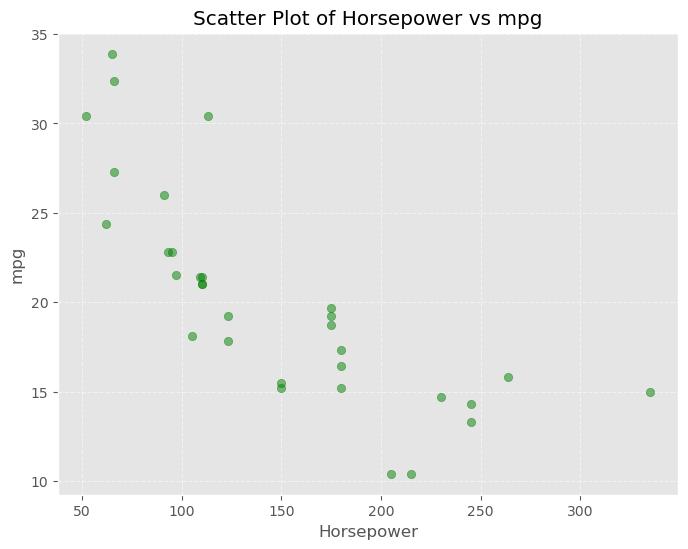

In [571]:
#your code here

plt.figure(figsize=(8, 6))
plt.scatter(dfcars['hp'], dfcars['mpg'], color='green', alpha=0.5)
plt.title('Scatter Plot of Horsepower vs mpg')
plt.xlabel('Horsepower')
plt.ylabel('mpg')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()





In [572]:
dfcars['cyl'].corr(dfcars['mpg'])

-0.8521619594266132

In [573]:
dfcars['hp'].corr(dfcars['mpg'])

-0.7761683718265864

In [574]:
#your code here
# create linear regression object with sklearn

from sklearn.linear_model import LinearRegression


#your code here
# train the model and make predictions

X = dfcars[['hp']]
Y = dfcars['mpg']

model = LinearRegression()
model.fit(X, Y)








LinearRegression()

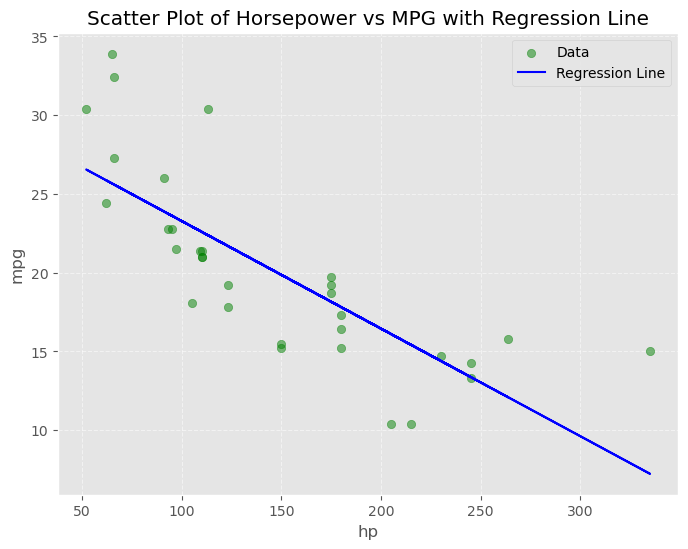

In [575]:
# your code here
# Plot outputs

plt.figure(figsize=(8, 6))
plt.scatter(X, Y, color='green', alpha=0.5, label='Data')

plt.plot(X, model.predict(X), color='blue', label='Regression Line')

plt.title('Scatter Plot of Horsepower vs MPG with Regression Line')
plt.xlabel('hp')
plt.ylabel('mpg')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


Predict the value of "mpg" for a given value of "horsepower" = 100 using the linear regression model

In [576]:
X_new = pd.DataFrame({'hp': [100]})
model.predict(X_new)

array([23.27603273])

Plot the data and the prediction

Reconstruct the scatter plot of "horsepower" vs "mpg" with the regression line and the predicted point

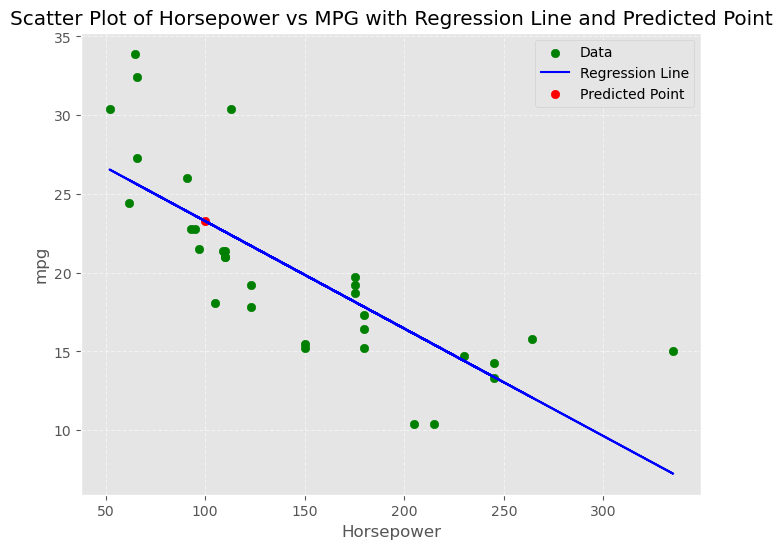

In [577]:
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, color='green', label='Data')

plt.plot(X, model.predict(X), color='blue', label='Regression Line')

plt.scatter(100, model.predict(X_new), color='red', label='Predicted Point')


plt.title('Scatter Plot of Horsepower vs MPG with Regression Line and Predicted Point')
plt.xlabel('Horsepower')
plt.ylabel('mpg')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

  Calculate the coefficient of determination (R2) and R2-adjasted

In [578]:
from sklearn.metrics import r2_score


R_squared = r2_score(Y, model.predict(X))

k = 1  # We have only one predictor, which is 'horsepower'
R_squared_adj = 1 - (1 - R_squared) * (len(Y) - 1) / (len(Y) - k - 1)

print("R-squared (R²):", R_squared)
print("Adjusted R-squared (R²_adj):", R_squared_adj)

R-squared (R²): 0.602437341423934
Adjusted R-squared (R²_adj): 0.5891852528047318


# Diabetes Dataset - Multiple linear regression 

Now we are going to fit the training data (from the diabetes dataset built into sklearn) using multiple linear regression with multiple predictors. 

In [ ]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [ ]:
data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
data.boxplot(rot=90)
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


Above I put the data into a pandas dataframe and then tried to visualise it. You will notice all of the data is in a similar range

### Normalised data
They all have a mean of 0 and standard deviation of 1. This is called Normalising the data and is a common step that I'll get into later on.

The obvious one you'll notice is the sex variable. This has two options which are 0.050680 or -0.044642, when usually with 2 options we would go with 0 and 1. The numbers were changed due to this normalisation

In [ ]:
X = data 
y = diabetes.target

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X,y)

LinearRegression()

In [ ]:
r_squared = lr.score(X,y)
r_squared

0.5177484222203499

Let's do a slightly different r2

In [ ]:
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
adjusted_r_squared

0.5065592904853232

In [ ]:
lr.coef_

array([ -10.0098663 , -239.81564367,  519.84592005,  324.3846455 ,
       -792.17563855,  476.73902101,  101.04326794,  177.06323767,
        751.27369956,   67.62669218])

In [ ]:
lr.intercept_

152.13348416289597

In [ ]:
coef=pd.Series(lr.coef_ , index=diabetes.feature_names)
coef.plot(kind='bar', color = list('rgbkymc'))
plt.ylabel('Coefficient')

Text(0, 0.5, 'Coefficient')

Some of those coefficients are very large, and it looks like age does not contribute as much as the others

The very large coefficients can often be problematic so we'll have to think about this one again later

Maybe removing age will give us a better model

We don't really have enough knowledge to figure it out. It's possible you would get a better model without age, s3, s4 and s6